<a href="https://colab.research.google.com/github/feliperromao/datascience-na-pratica/blob/main/An%C3%A1lise_de_dados_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-04-09/visualisations/listings.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,59,3,278,2020-02-14,1.90,1,152
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,NaN,Centrum-Oost,52.36407,4.89393,Private room,200,1,339,2020-04-09,2.50,2,0
2,25428,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",56142,Joan,NaN,Centrum-West,52.37490,4.88487,Entire home/apt,125,14,5,2020-02-09,0.13,2,132
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.38761,4.89188,Private room,141,2,219,2020-07-25,1.94,1,66
4,28871,Comfortable double room,124245,Edwin,NaN,Centrum-West,52.36775,4.89092,Private room,75,2,336,2020-09-20,2.59,2,335


In [4]:
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

print(df.dtypes)

Entradas:	 17825
Variáveis:	 16

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [5]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.134642
last_review                       0.134642
host_name                         0.033380
name                              0.001795
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbbd27c0450>,
      dtype=object)

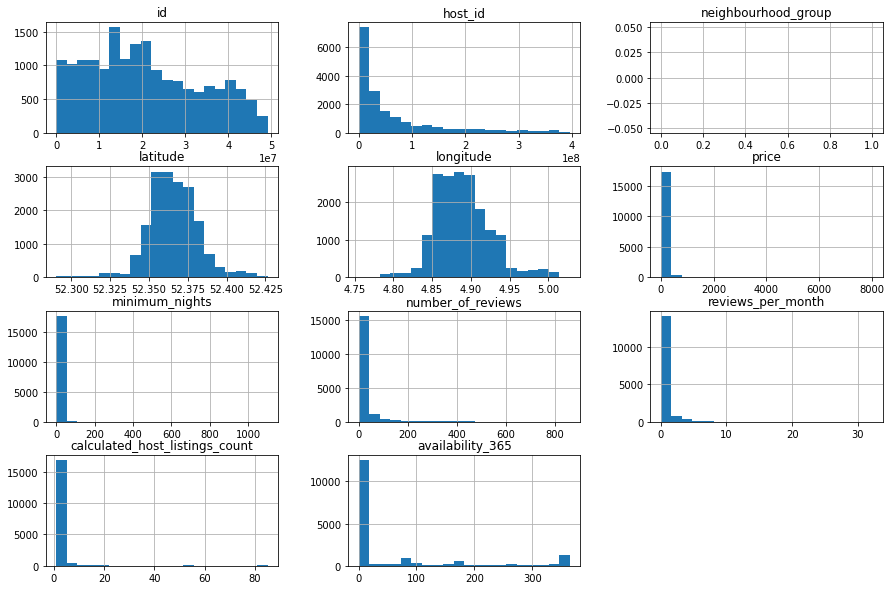

In [6]:
df.hist(bins=20, figsize=(15,10))

## Q4. Há outliers presentes?

In [7]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,17825.000000,17825.000000,17825.000000,15425.000000,17825.000000,17825.000000
mean,154.495877,3.867041,23.952875,0.562200,2.684376,61.448247
std,154.162566,18.732039,54.831150,1.017706,8.813855,114.424897
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,95.000000,2.000000,2.000000,0.120000,1.000000,0.000000
50%,129.000000,2.000000,8.000000,0.260000,1.000000,0.000000
75%,180.000000,3.000000,21.000000,0.540000,1.000000,83.000000
max,8000.000000,1100.000000,860.000000,32.190000,85.000000,365.000000


In [8]:
normalized_df = df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]]

### Boxplot para `minimum_nights`

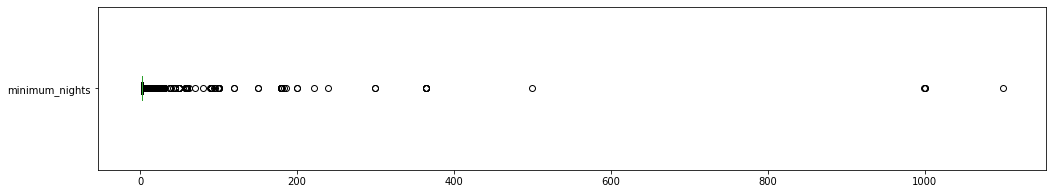

minimum_nights: valores acima de 30:
95 entradas
0.5330%


In [9]:
df.minimum_nights.plot(kind="box", vert=False, figsize=(17,3))
plt.show()


# Ver quantidade de valores acima de 30
entries_minimum_nights = len(df[df.minimum_nights > 30])
percent_minimum_nights = len(df[df.minimum_nights > 30]) / df.shape[0] * 100
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(entries_minimum_nights))
print("{:.4f}%".format(percent_minimum_nights))

### Boxplot para `price`

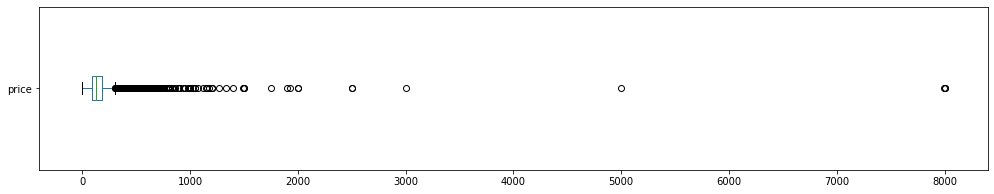

price: valores acima de 1500:
12 entradas
0.0673%


In [15]:
df.price.plot(kind="box", vert=False, figsize=(17,3))
plt.show()

# Ver quantidade de valores acima de 1500
entries_price = len(df[df.price > 1500])
percent_price = len(df[df.price > 1500]) / df.shape[0] * 100
print("price: valores acima de 1500:")
print("{} entradas".format(entries_price))
print("{:.4f}%".format(percent_price))

### Histogramas sem outliers
- Cria uma copia do dataframe
- Exclui registros cujo os valores de price são maiores que 1500
- remove o `neighbourhood_group` pois esta vazio


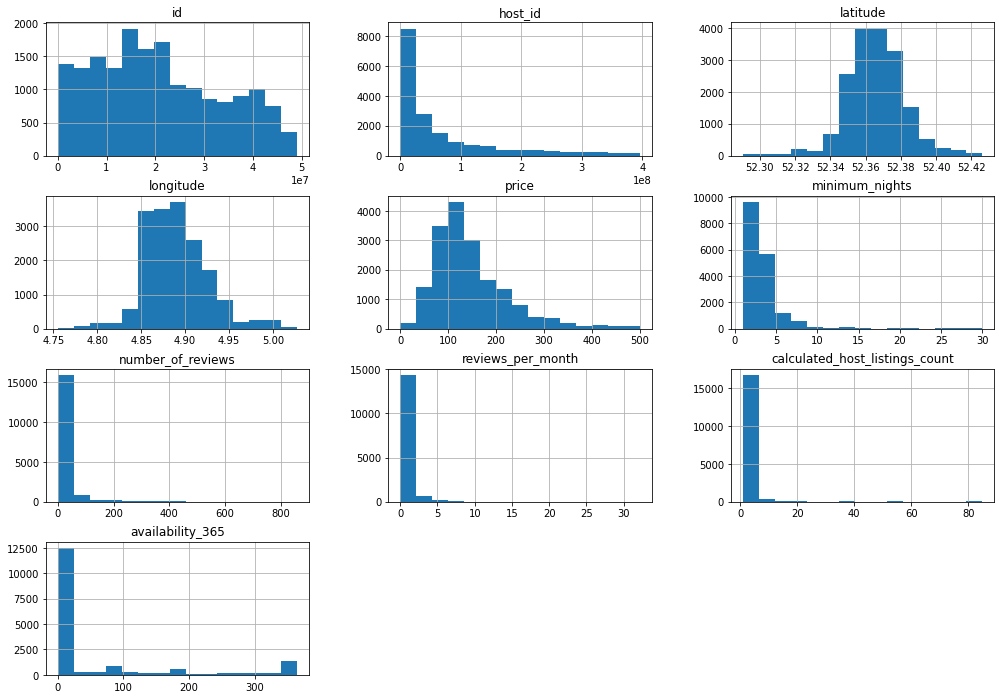

In [24]:

# Cria uma copia do dataframe
df_clean = df.copy()

# Exclui registros cujo os valores de price são maiores que 500
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remove o `neighbourhood_group` pois esta vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

df_clean.hist(bins=15, figsize=(17,12))
plt.show()

## Verificando a correlação entre os dados

In [27]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.009274,-0.122736,-0.152034,0.072980,0.074273
minimum_nights,-0.009274,1.000000,-0.072768,-0.099426,-0.030041,0.013787
number_of_reviews,-0.122736,-0.072768,1.000000,0.836449,-0.026505,0.268068
reviews_per_month,-0.152034,-0.099426,0.836449,1.000000,-0.004495,0.314557
calculated_host_listings_count,0.072980,-0.030041,-0.026505,-0.004495,1.000000,0.017185
availability_365,0.074273,0.013787,0.268068,0.314557,0.017185,1.000000


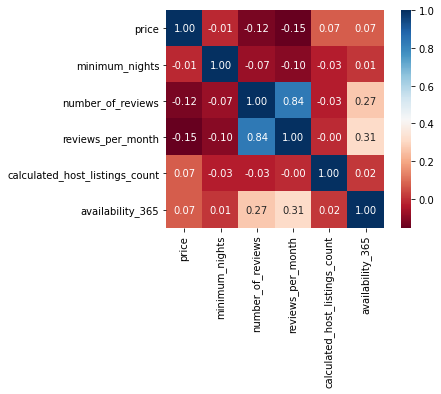

In [31]:
sns.heatmap(corr, cmap="RdBu", fmt='.2f',square=True, linecolor='white', annot=True)

## Tipo de imóvel mais alugado no Airbnb

In [40]:
# Quantidade
df_clean.room_type.value_counts()

# Percentual
df_clean.room_type.value_counts(normalize=True).map('{:.1%}'.format)

Entire home/apt    77.8%
Private room       21.2%
Hotel room          0.7%
Shared room         0.3%
Name: room_type, dtype: object

## Localizade mais cara do Rio

In [43]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-Oost                166.452545
IJburg - Zeeburgereiland    164.516990
Centrum-West                163.749354
Zuid                        159.731632
De Pijp - Rivierenbuurt     154.531963
Westerpark                  144.930929
Watergraafsmeer             144.792706
De Baarsjes - Oud-West      144.269533
Oud-Oost                    142.009709
Oud-Noord                   141.947368
Name: price, dtype: float64

In [47]:
df[df.neighbourhood == "Oud-Oost"].shape

(1142, 16)

In [56]:
df_clean.groupby(['neighbourhood']).size().sort_values(ascending=False)

neighbourhood
De Baarsjes - Oud-West                    2931
De Pijp - Rivierenbuurt                   2190
Centrum-West                              1935
Centrum-Oost                              1454
Westerpark                                1303
Zuid                                      1293
Oud-Oost                                  1133
Bos en Lommer                             1006
Oostelijk Havengebied - Indische Buurt     824
Oud-Noord                                  570
Watergraafsmeer                            521
IJburg - Zeeburgereiland                   412
Slotervaart                                382
Noord-West                                 362
Noord-Oost                                 246
Buitenveldert - Zuidas                     227
Geuzenveld - Slotermeer                    207
De Aker - Nieuw Sloten                     122
Osdorp                                     113
Gaasperdam - Driemond                      112
Bijlmer-Centrum                            104

## Plotar imóveis pela latitude-longitude

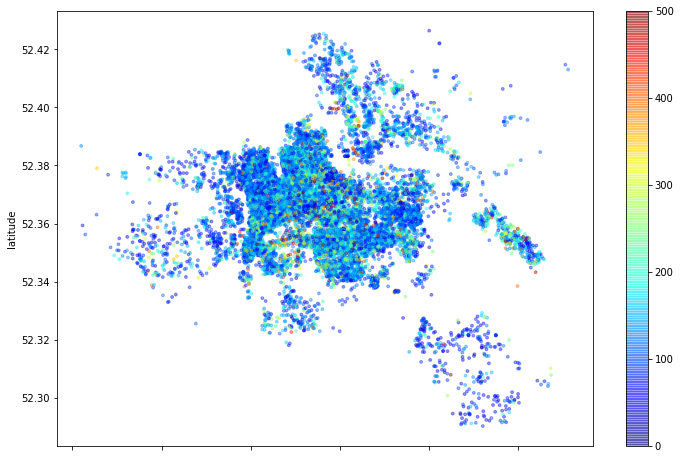

In [62]:
df_clean.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8))